In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

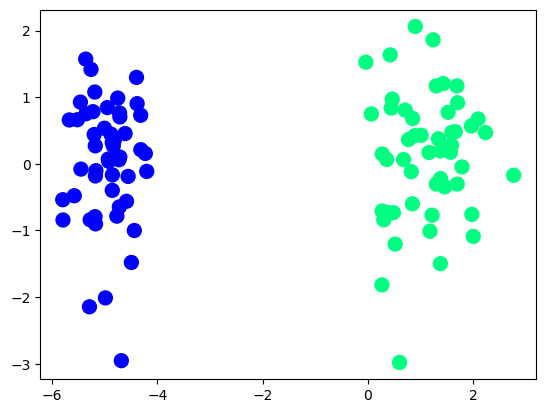

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)
plt.scatter(X[:,0], X[:,1], c=y,s=100, cmap="winter")

In [44]:
class LogisticRegressionGD:
    def __init__(self, epochs=100, learning_rate=0.1):
        self.epochs=epochs
        self.lr = learning_rate
        self.coef_ = None

    def fit(self, X, y):
        X = add_dummy_feature(X)
        self.coef_ = np.ones(X.shape[1])

        for _ in range(self.epochs):
            y_hat = LogisticRegressionGD.sigmoid(np.dot(X, self.coef_))
            self.coef_ = self.coef_ + self.lr * (np.dot(y-y_hat, X) / X.shape[0])
            
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))        

In [45]:
lor = LogisticRegressionGD(epochs=5000, learning_rate=0.5)
lor.fit(X, y)

In [46]:
lor.coef_

array([5.10291665, 3.47974267, 0.13305072])

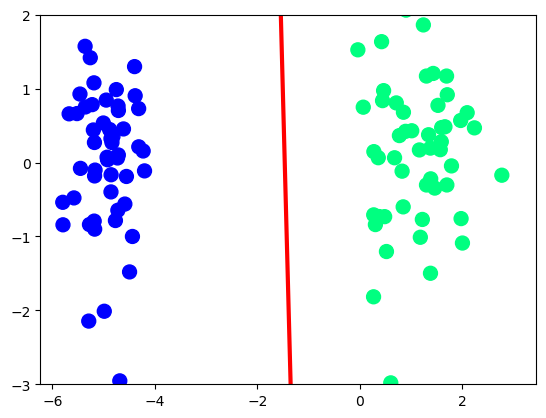

In [60]:
m1 = -(lor.coef_[1]/lor.coef_[2])
b1 = -(lor.coef_[0]/lor.coef_[2])

x_input1 = np.linspace(-3, 3, 100)
y_input1 = m1*x_input1 + b1

plt.scatter(X[:,0], X[:,1], c=y,s=100, cmap="winter")
plt.plot(x_input1, y_input1, "r-", lw=3)
plt.ylim(-3,2)
plt.show()

In [52]:
lor2 = LogisticRegression(penalty=None, solver="sag")
lor2.fit(X, y)

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [55]:
print(lor2.coef_)
print(lor2.intercept_)

[[3.91825518 0.15570123]]
[4.21452524]


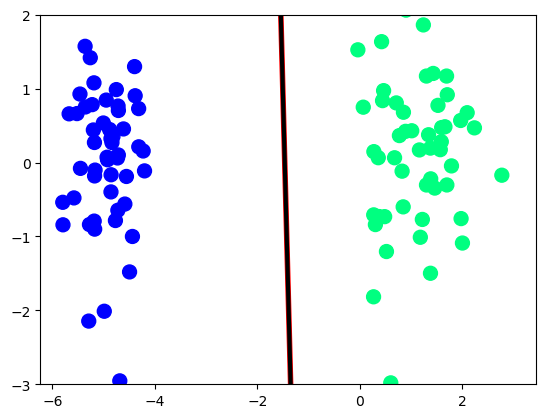

In [65]:
m2 = -(lor2.coef_[0][0]/lor2.coef_[0][1])
b2 = -(lor2.intercept_/lor2.coef_[0][1])

y_input = m2*x_input1 + b2

plt.scatter(X[:,0], X[:,1], c=y,s=100, cmap="winter")
plt.plot(x_input1, y_input1, "r-", lw=4)
plt.plot(x_input1, y_input2, "k-", lw=3)
plt.ylim(-3,2)
plt.show()